### Project:- Bike Demand Prediction

## Problem Statement:-
In modern urban cities, bike-sharing systems have become a popular, eco-friendly mode of transport. However, managing these systems effectively is a challenge, especially when it comes to ensuring that bikes are available when and where users need them.

A major operational issue is the imbalance between bike supply and demand at different times of the day, week, or during specific weather conditions. Unavailability of bikes during peak hours or oversupply during low-demand periods can lead to poor user experience, financial inefficiencies, and logistical burdens.

This project aims to solve the following problem:

"Can we predict the hourly demand for rental bikes in an urban city based on historical usage patterns, weather conditions, and calendar features?"

🎯 Objectives:
Predict the number of bikes required per hour using machine learning.

Understand key factors affecting demand (e.g., time of day, weather, working day).

Reduce waiting times for users and optimize fleet distribution.

Provide a foundation for real-time deployment and future smart city integration.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df.shape

(17379, 17)

In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Dropping irrelevant features such as : instant,casual,registered

In [6]:
df=df.drop(columns=['instant','registered','casual'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB


### Convert dteday in proper datetime format and removing new columns like day,is_weekend

In [8]:
#Convert to datetime
df['dteday']=pd.to_datetime(df['dteday'])

In [9]:
#Extract features
df['day']=df['dteday'].dt.day
df['is_weekend']=df['weekday'].apply(lambda x:1 if x==0 or x==6 else 0)  #0:Sunday, 6:Saturday


In [10]:
print(df[['dteday','day','weekday','is_weekend']].head())

      dteday  day  weekday  is_weekend
0 2011-01-01    1        6           1
1 2011-01-01    1        6           1
2 2011-01-01    1        6           1
3 2011-01-01    1        6           1
4 2011-01-01    1        6           1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  cnt         17379 non-null  int64         
 14  day         17379 non-null  int32         
 15  is_weekend  17379 non-null  int64         
dtypes: datetime64[ns](1), 

### Cyclical encoding of hour column

In [12]:
#cyclical encoding of hour
df['sin_hour']=np.sin(2*np.pi*df['hr']/24)
df['cos_hour']=np.cos(2*np.pi*df['hr']/24)

In [13]:
print(df[['hr','sin_hour','cos_hour']].head(24))

    hr      sin_hour      cos_hour
0    0  0.000000e+00  1.000000e+00
1    1  2.588190e-01  9.659258e-01
2    2  5.000000e-01  8.660254e-01
3    3  7.071068e-01  7.071068e-01
4    4  8.660254e-01  5.000000e-01
5    5  9.659258e-01  2.588190e-01
6    6  1.000000e+00  6.123234e-17
7    7  9.659258e-01 -2.588190e-01
8    8  8.660254e-01 -5.000000e-01
9    9  7.071068e-01 -7.071068e-01
10  10  5.000000e-01 -8.660254e-01
11  11  2.588190e-01 -9.659258e-01
12  12  1.224647e-16 -1.000000e+00
13  13 -2.588190e-01 -9.659258e-01
14  14 -5.000000e-01 -8.660254e-01
15  15 -7.071068e-01 -7.071068e-01
16  16 -8.660254e-01 -5.000000e-01
17  17 -9.659258e-01 -2.588190e-01
18  18 -1.000000e+00 -1.836970e-16
19  19 -9.659258e-01  2.588190e-01
20  20 -8.660254e-01  5.000000e-01
21  21 -7.071068e-01  7.071068e-01
22  22 -5.000000e-01  8.660254e-01
23  23 -2.588190e-01  9.659258e-01


### Encoding categorical variables like season and weathersit

In [14]:
df=pd.get_dummies(df,columns=['season','weathersit'],drop_first=True,dtype=int)

In [15]:
df.columns

Index(['dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day', 'is_weekend',
       'sin_hour', 'cos_hour', 'season_2', 'season_3', 'season_4',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [16]:
df.head()

,dteday,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,...,day,is_weekend,sin_hour,cos_hour,season_2,season_3,season_4,weathersit_2,weathersit_3,weathersit_4
0,2011-01-01,0,1,0,0,6,0,0.24,0.2879,0.81,...,1,1,0.000000,1.000000,0,0,0,0,0,0
1,2011-01-01,0,1,1,0,6,0,0.22,0.2727,0.80,...,1,1,0.258819,0.965926,0,0,0,0,0,0
2,2011-01-01,0,1,2,0,6,0,0.22,0.2727,0.80,...,1,1,0.500000,0.866025,0,0,0,0,0,0
3,2011-01-01,0,1,3,0,6,0,0.24,0.2879,0.75,...,1,1,0.707107,0.707107,0,0,0,0,0,0
4,2011-01-01,0,1,4,0,6,0,0.24,0.2879,0.75,...,1,1,0.866025,0.500000,0,0,0,0,0,0


In [17]:
df.rename(columns={
    'season_2':'season_summer',
    'season_3':'season_fall',
    'season_4':'season_winter',
    'weathersit_2':'weather_mist',
    'weathersit_3':'weather_light_rain_snow',
    'weathersit_4':'weather_heavy_rain_snow'
},inplace=True)

In [18]:
df.columns

Index(['dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day', 'is_weekend',
       'sin_hour', 'cos_hour', 'season_summer', 'season_fall', 'season_winter',
       'weather_mist', 'weather_light_rain_snow', 'weather_heavy_rain_snow'],
      dtype='object')

#### Drop irrelevant columns

In [19]:
df=df.drop(columns=['dteday'])

In [20]:
df.columns

Index(['yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'day', 'is_weekend', 'sin_hour', 'cos_hour',
       'season_summer', 'season_fall', 'season_winter', 'weather_mist',
       'weather_light_rain_snow', 'weather_heavy_rain_snow'],
      dtype='object')

### Splitting the columns as training and testing

In [21]:
from sklearn.model_selection import train_test_split
X=df.drop('cnt',axis=1)
y=df['cnt']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print("Training set shape",X_train.shape)
print("Testing set shape",X_test.shape)

Training set shape (13903, 20)
Testing set shape (3476, 20)


## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=lr_model.predict(X_test)

In [27]:
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print(f"R2 score:{r2:.4f}")
print(f"RMSE:{rmse:.2f}")

R2 score:0.5117
RMSE:124.34


##### Visualizing the results

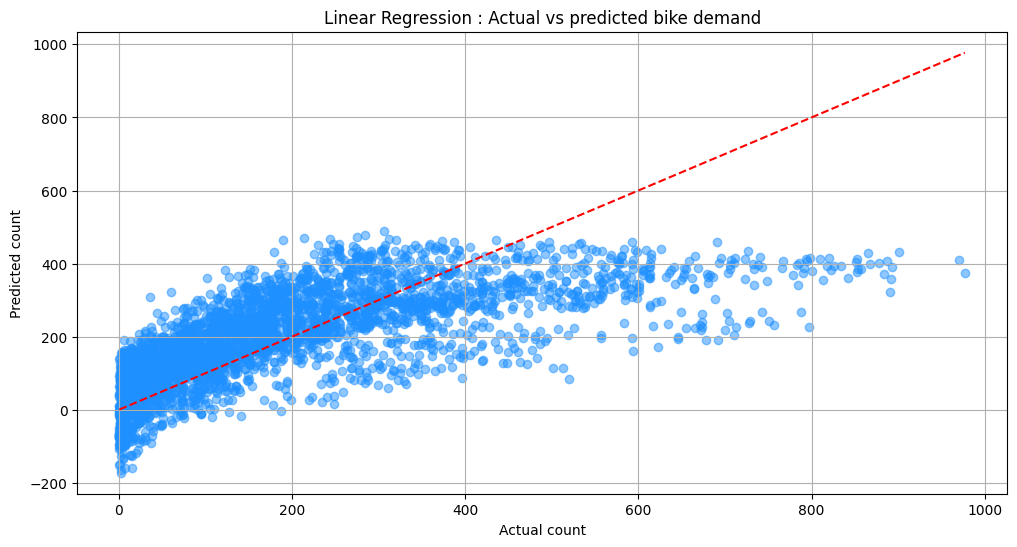

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,alpha=0.5,color='dodgerblue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.title('Linear Regression : Actual vs predicted bike demand')
plt.grid(True)
plt.show()

##### Some errors is showing let us applay another algorithm

## Random Forest regressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [31]:
rf_pred=rf_model.predict(X_test)

In [37]:
rf_r2=r2_score(y_test,rf_pred)
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))

print(f"rf_r2 score:{rf_r2:.4f}")
print(f"rf_rmse:{rf_rmse:.2f}")

rf_r2 score:0.9442
rf_rmse:42.05


#### Visualizing feature importance

In [38]:
import seaborn as sns

#get feature importances
importances=rf_model.feature_importances_
feature_names=X_train.columns

##  Creating dataframes for easy plotting

In [39]:
feat_imp=pd.DataFrame({'Feature':feature_names,'Importance':importances})
feat_imp=feat_imp.sort_values(by='Importance',ascending=False)

C:\Users\Ankit\AppData\Local\Temp\ipykernel_7948\442687926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_imp,palette='viridis')


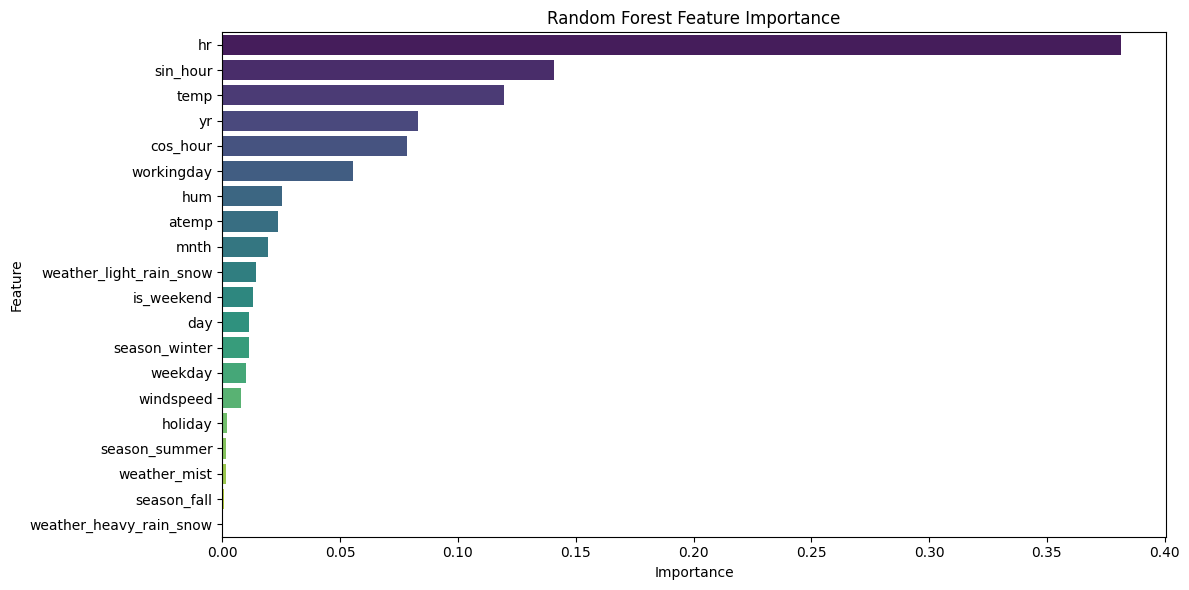

In [40]:
# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Importance',y='Feature',data=feat_imp,palette='viridis')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

## Time series plotting

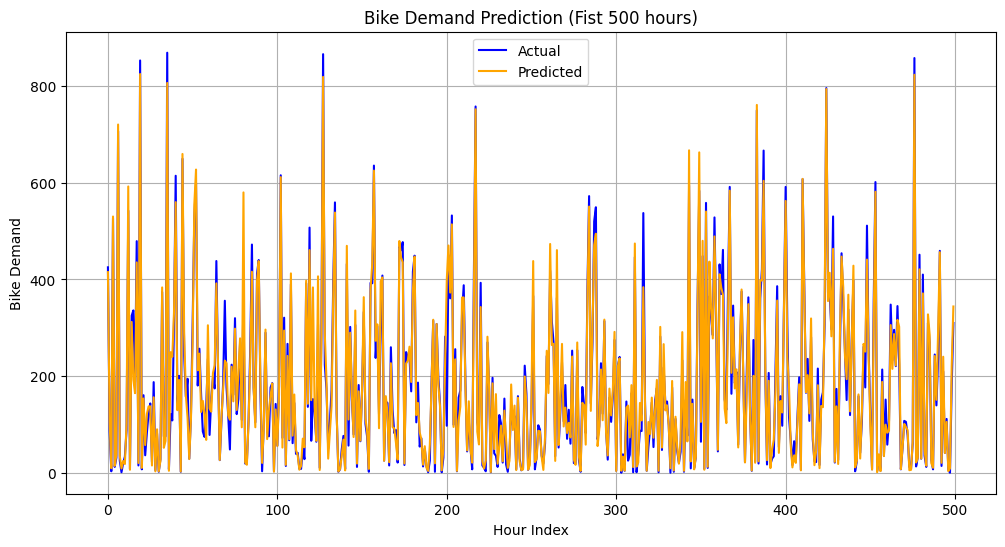

In [41]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:500],label='Actual',color='blue')
plt.plot(rf_pred[:500],label='Predicted',color='orange')
plt.legend()
plt.title("Bike Demand Prediction (Fist 500 hours)")
plt.xlabel("Hour Index")
plt.ylabel("Bike Demand")
plt.grid(True)
plt.show()

## Visualizing the results

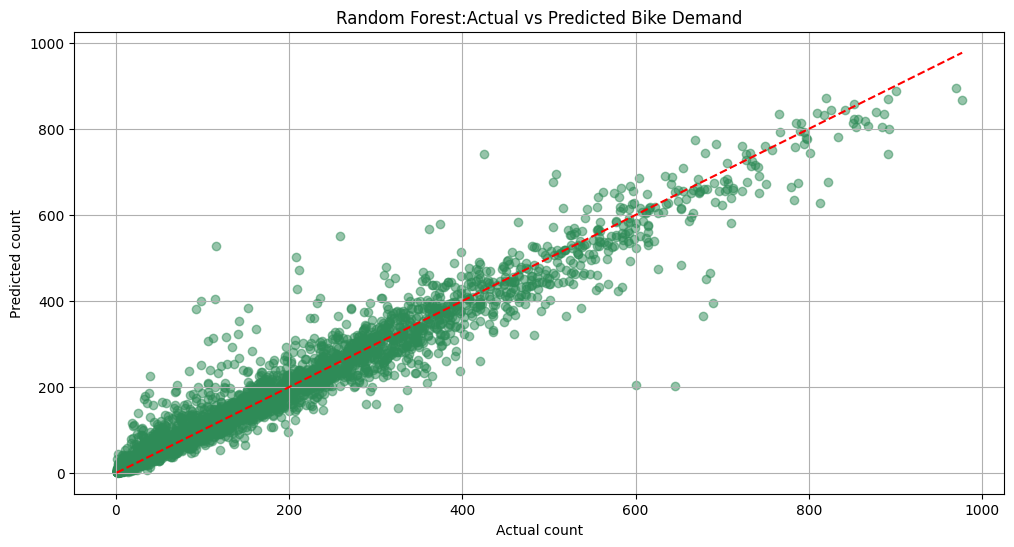

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,rf_pred,alpha=0.5,color='seagreen')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel("Actual count")
plt.ylabel("Predicted count")
plt.title("Random Forest:Actual vs Predicted Bike Demand")
plt.grid(True)
plt.show()

In [44]:
import plotly.graph_objects as go

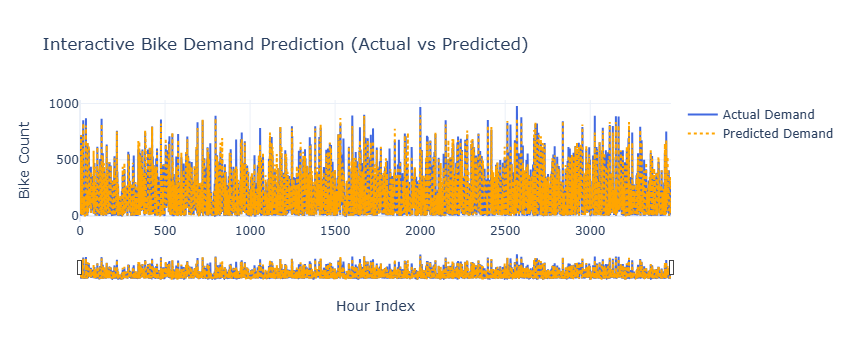

In [48]:
# Creating a dataframe with actual and predicted values
time_df=pd.DataFrame({'Actual':y_test.values,'Predicted':rf_pred})

time_df.reset_index(drop=True,inplace=True)

fig=go.Figure()


fig.add_trace(go.Scatter(
    y=time_df['Actual'],
    mode='lines',
    name='Actual Demand',
    line=dict(color='royalblue')
))

fig.add_trace(go.Scatter(
    y=time_df['Predicted'],
    mode='lines',
    name='Predicted Demand',
    line=dict(color='orange',dash='dot')
))

fig.update_layout(
    title='Interactive Bike Demand Prediction (Actual vs Predicted)',
    xaxis_title='Hour Index',
    yaxis_title='Bike Count',
    hovermode='x unified',
    template='plotly_white'
)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

# So, here is our best model